In [24]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import pickle
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [44]:
with open('book_movie_outliers_removed.pkl', 'rb') as f:
    book_movie = pickle.load(f)

In [45]:
book_movie.describe()

,book_rating,book_number_ratings,book_year_published,popularity,movie_runtime,movie_rating,movie_number_ratings
count,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000,692.000000
mean,3.923150,264583.513728,1949.299494,7.447980,111.765896,6.436416,404.706828
std,0.221697,294329.802907,63.663828,5.632245,26.258982,0.902868,528.527664
min,3.080000,209.000000,1803.625000,0.030000,50.000000,2.000000,1.000000
25%,3.800000,34436.000000,1920.250000,2.477500,95.000000,5.900000,20.000000
50%,3.940000,151602.000000,1976.000000,6.845000,107.500000,6.500000,131.500000
75%,4.070000,403176.500000,1998.000000,10.755000,125.000000,7.000000,635.750000
max,4.560000,956287.250000,2018.000000,23.171250,200.000000,10.000000,1559.375000


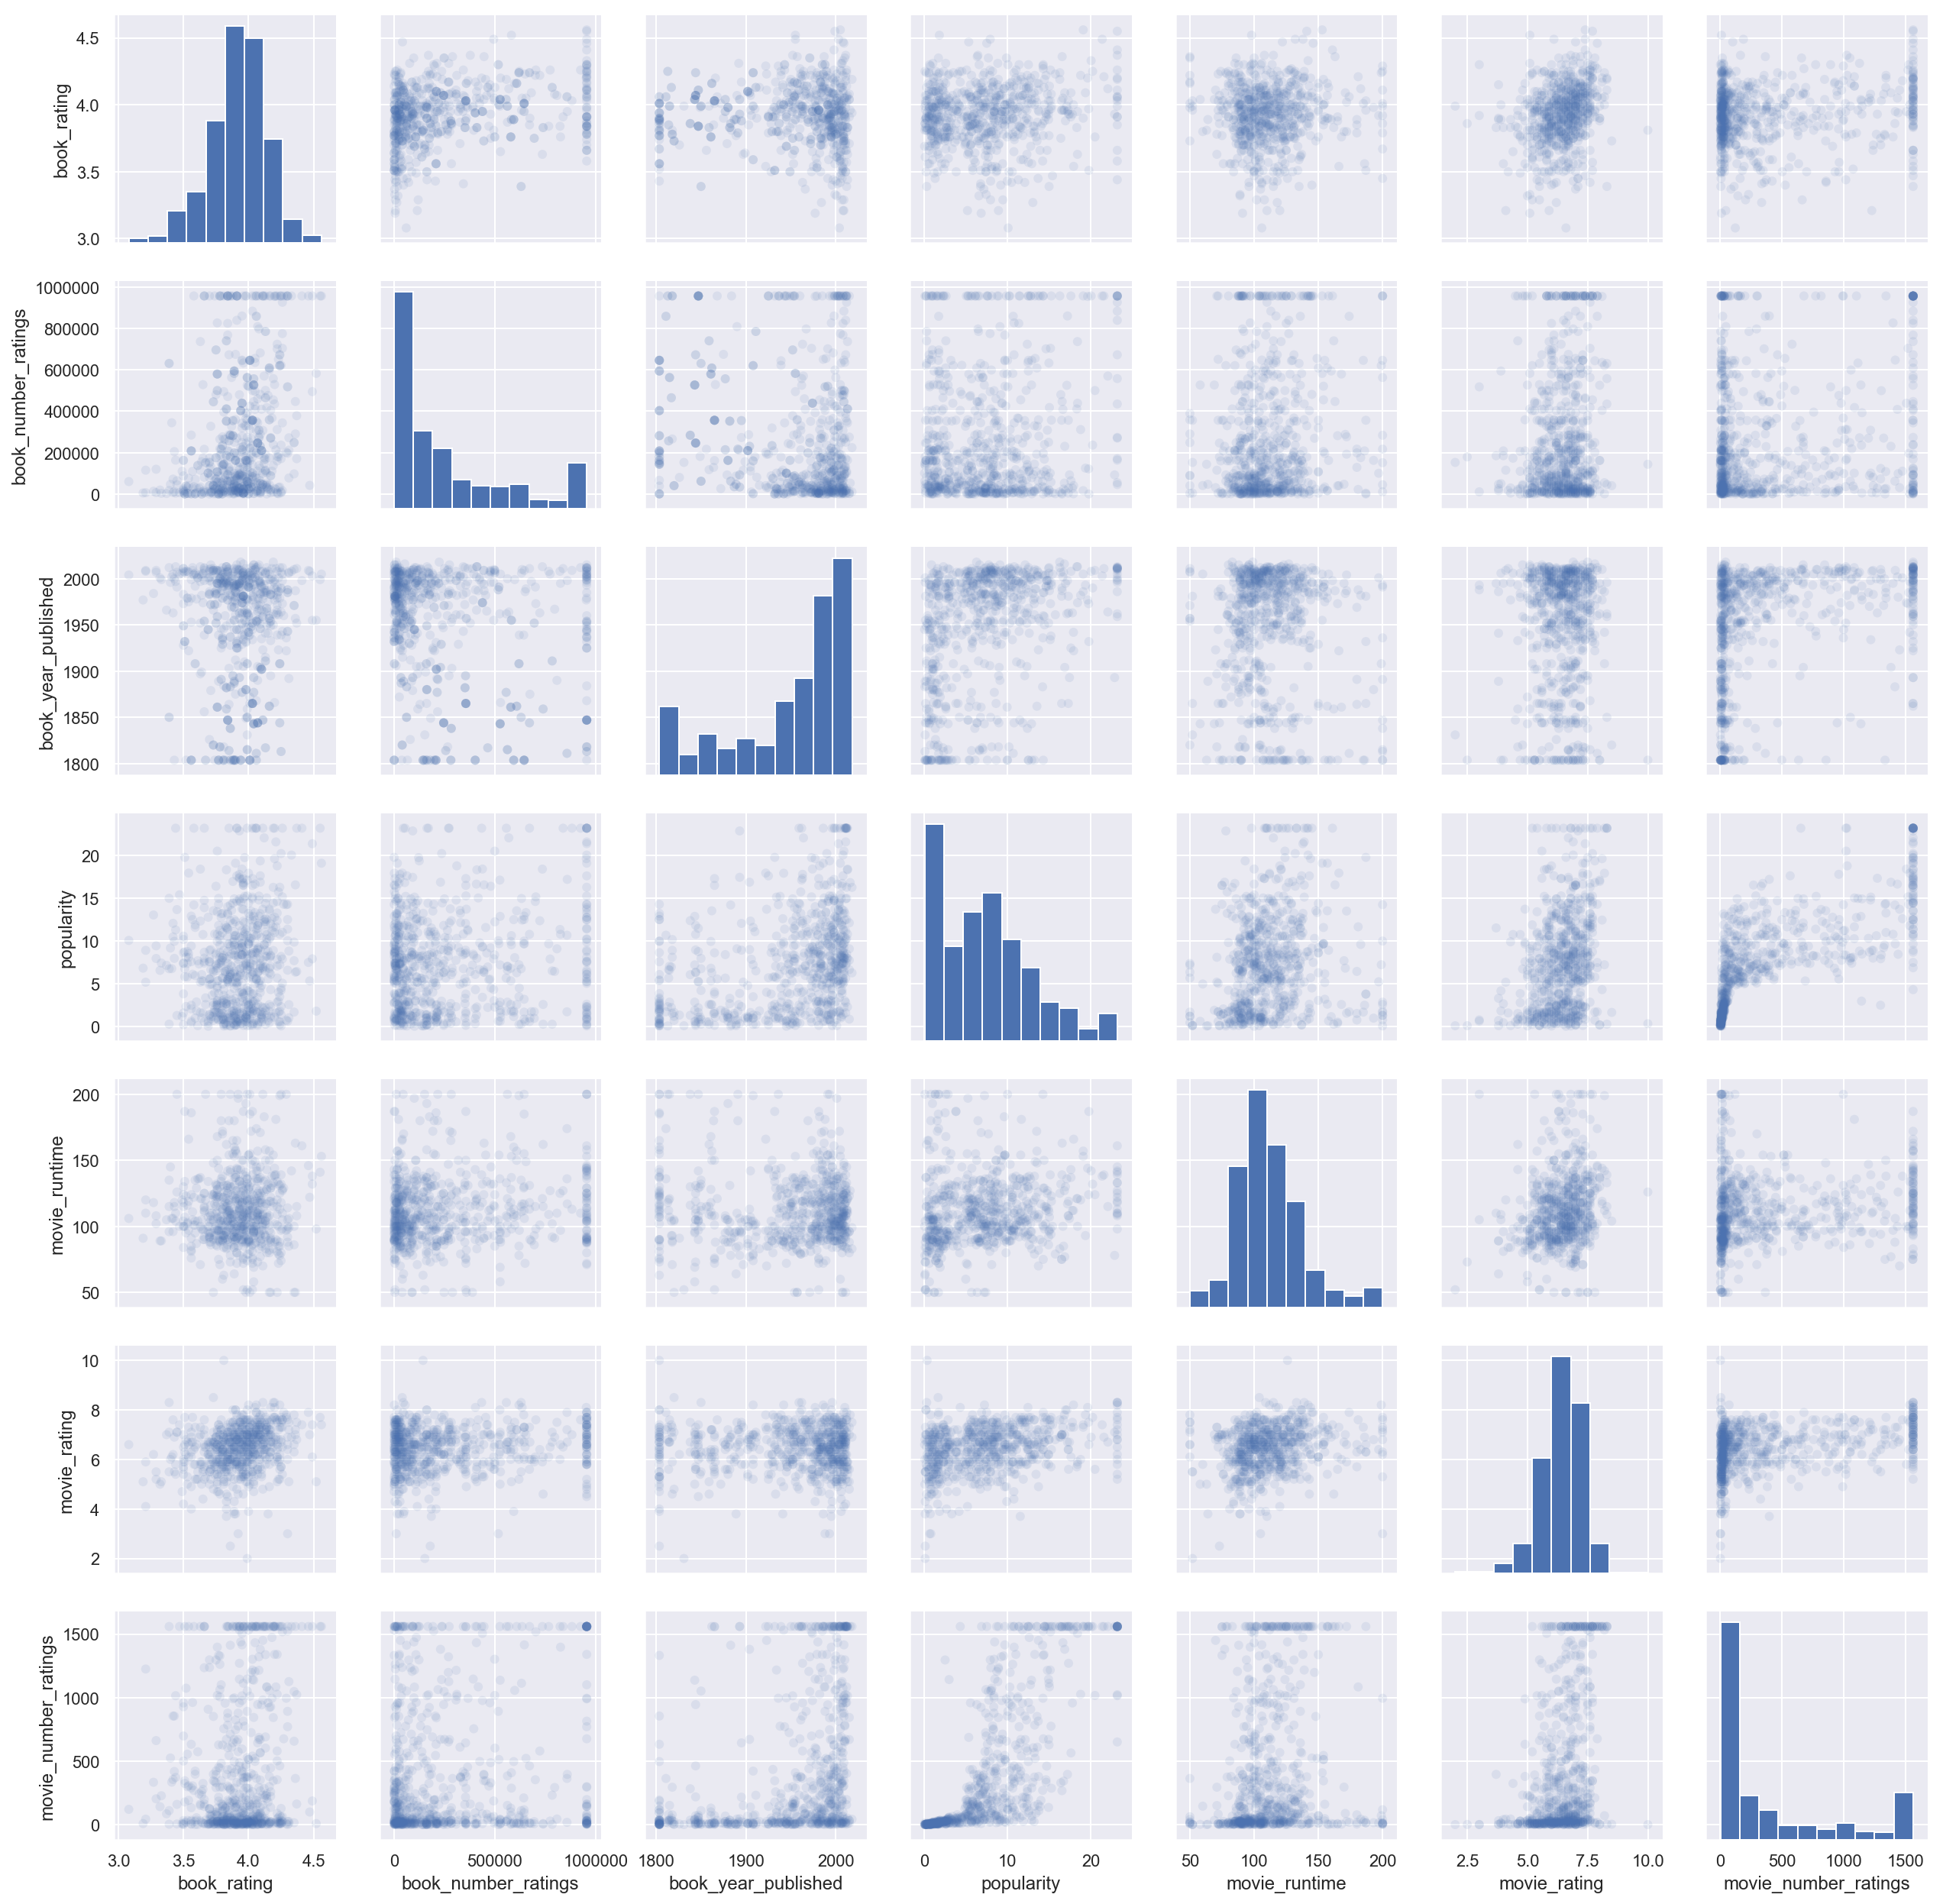

In [46]:
sns.pairplot(book_movie, plot_kws=dict(alpha=.1, edgecolor='none'))

In [87]:
#Separate our features from our target

X = book_movie.loc[:,['book_rating', 'book_number_ratings', 'popularity', 'movie_runtime', 'movie_number_ratings']]

y = book_movie['movie_rating']

In [88]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [89]:
split_and_validate(X, y)


Validation R^2 score was: 0.20660388239191274
Feature coefficient results: 

book_rating : 0.93
book_number_ratings : -0.00
popularity : 0.02
movie_runtime : 0.01
movie_number_ratings : 0.00


In [95]:
X2 = X.copy()

# multiplication interaction
X2['movie_popularity'] = X2['popularity']/X2['movie_number_ratings']

split_and_validate(X2, y)


Validation R^2 score was: 0.21416974277608747
Feature coefficient results: 

book_rating : 0.95
book_number_ratings : -0.00
popularity : 0.02
movie_runtime : 0.01
movie_number_ratings : 0.00
movie_popularity : -1.34


In [99]:
X3 = X2.copy()

# log
#X3['movie_popularity'] = np.log(X3['movie_popularity'])
X3['popularity'] = np.log(X3['popularity'])
X3['book_number_ratings'] = np.log(X3['book_number_ratings'])
X3['movie_number_ratings'] = np.log(X3['movie_number_ratings'])
X3['movie_runtime'] = np.log(X3['movie_runtime'])

split_and_validate(X3, y)


Validation R^2 score was: 0.21491356866824132
Feature coefficient results: 

book_rating : 1.03
book_number_ratings : -0.02
popularity : 0.01
movie_runtime : 0.59
movie_number_ratings : 0.12
movie_popularity : -0.65


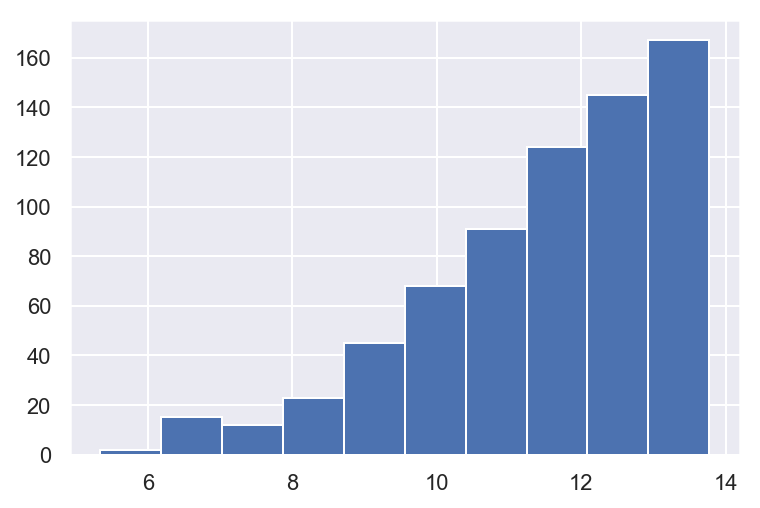

In [80]:
X3['book_number_ratings'].hist()

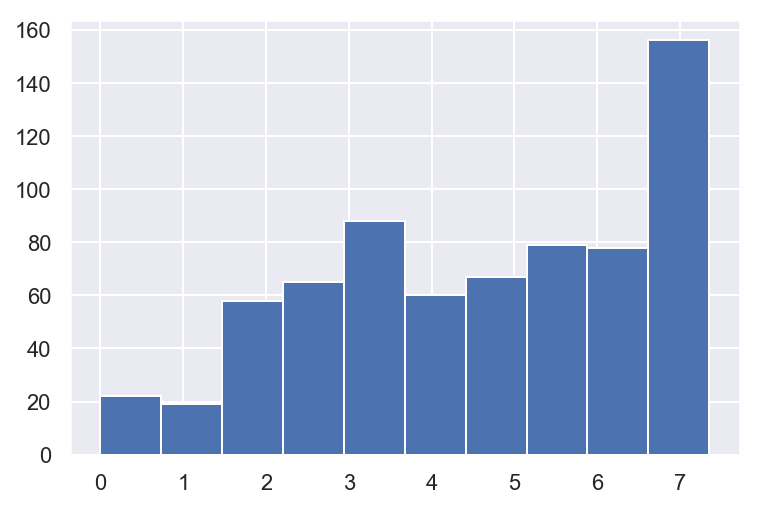

In [81]:
X3['movie_number_ratings'].hist()

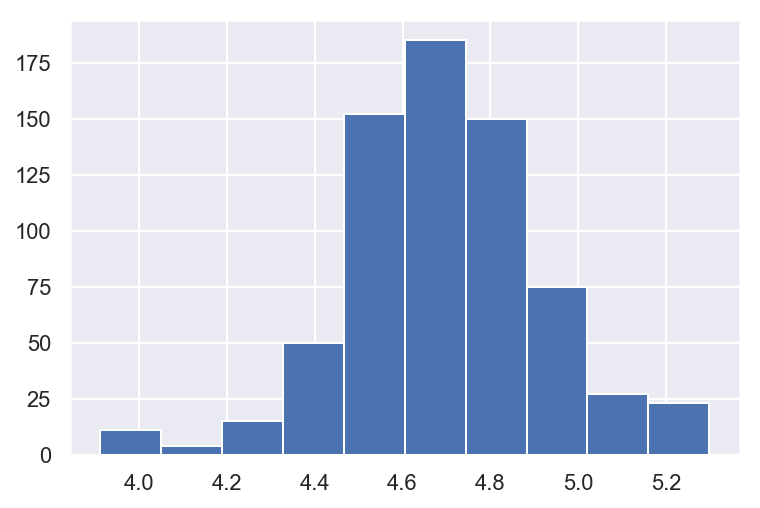

In [82]:
X3['movie_runtime'].hist()

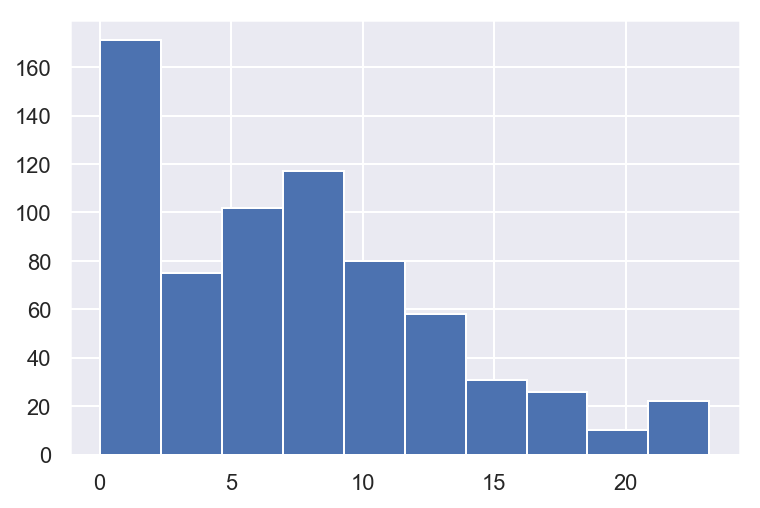

In [83]:
X3['popularity'].hist()

In [92]:
X4 = X3.copy()

X4


split_and_validate(X4, y)


Validation R^2 score was: 0.21111105805356245
Feature coefficient results: 

book_rating : 1.02
book_number_ratings : -0.02
popularity : -0.00
movie_runtime : 0.57
movie_number_ratings : 0.16


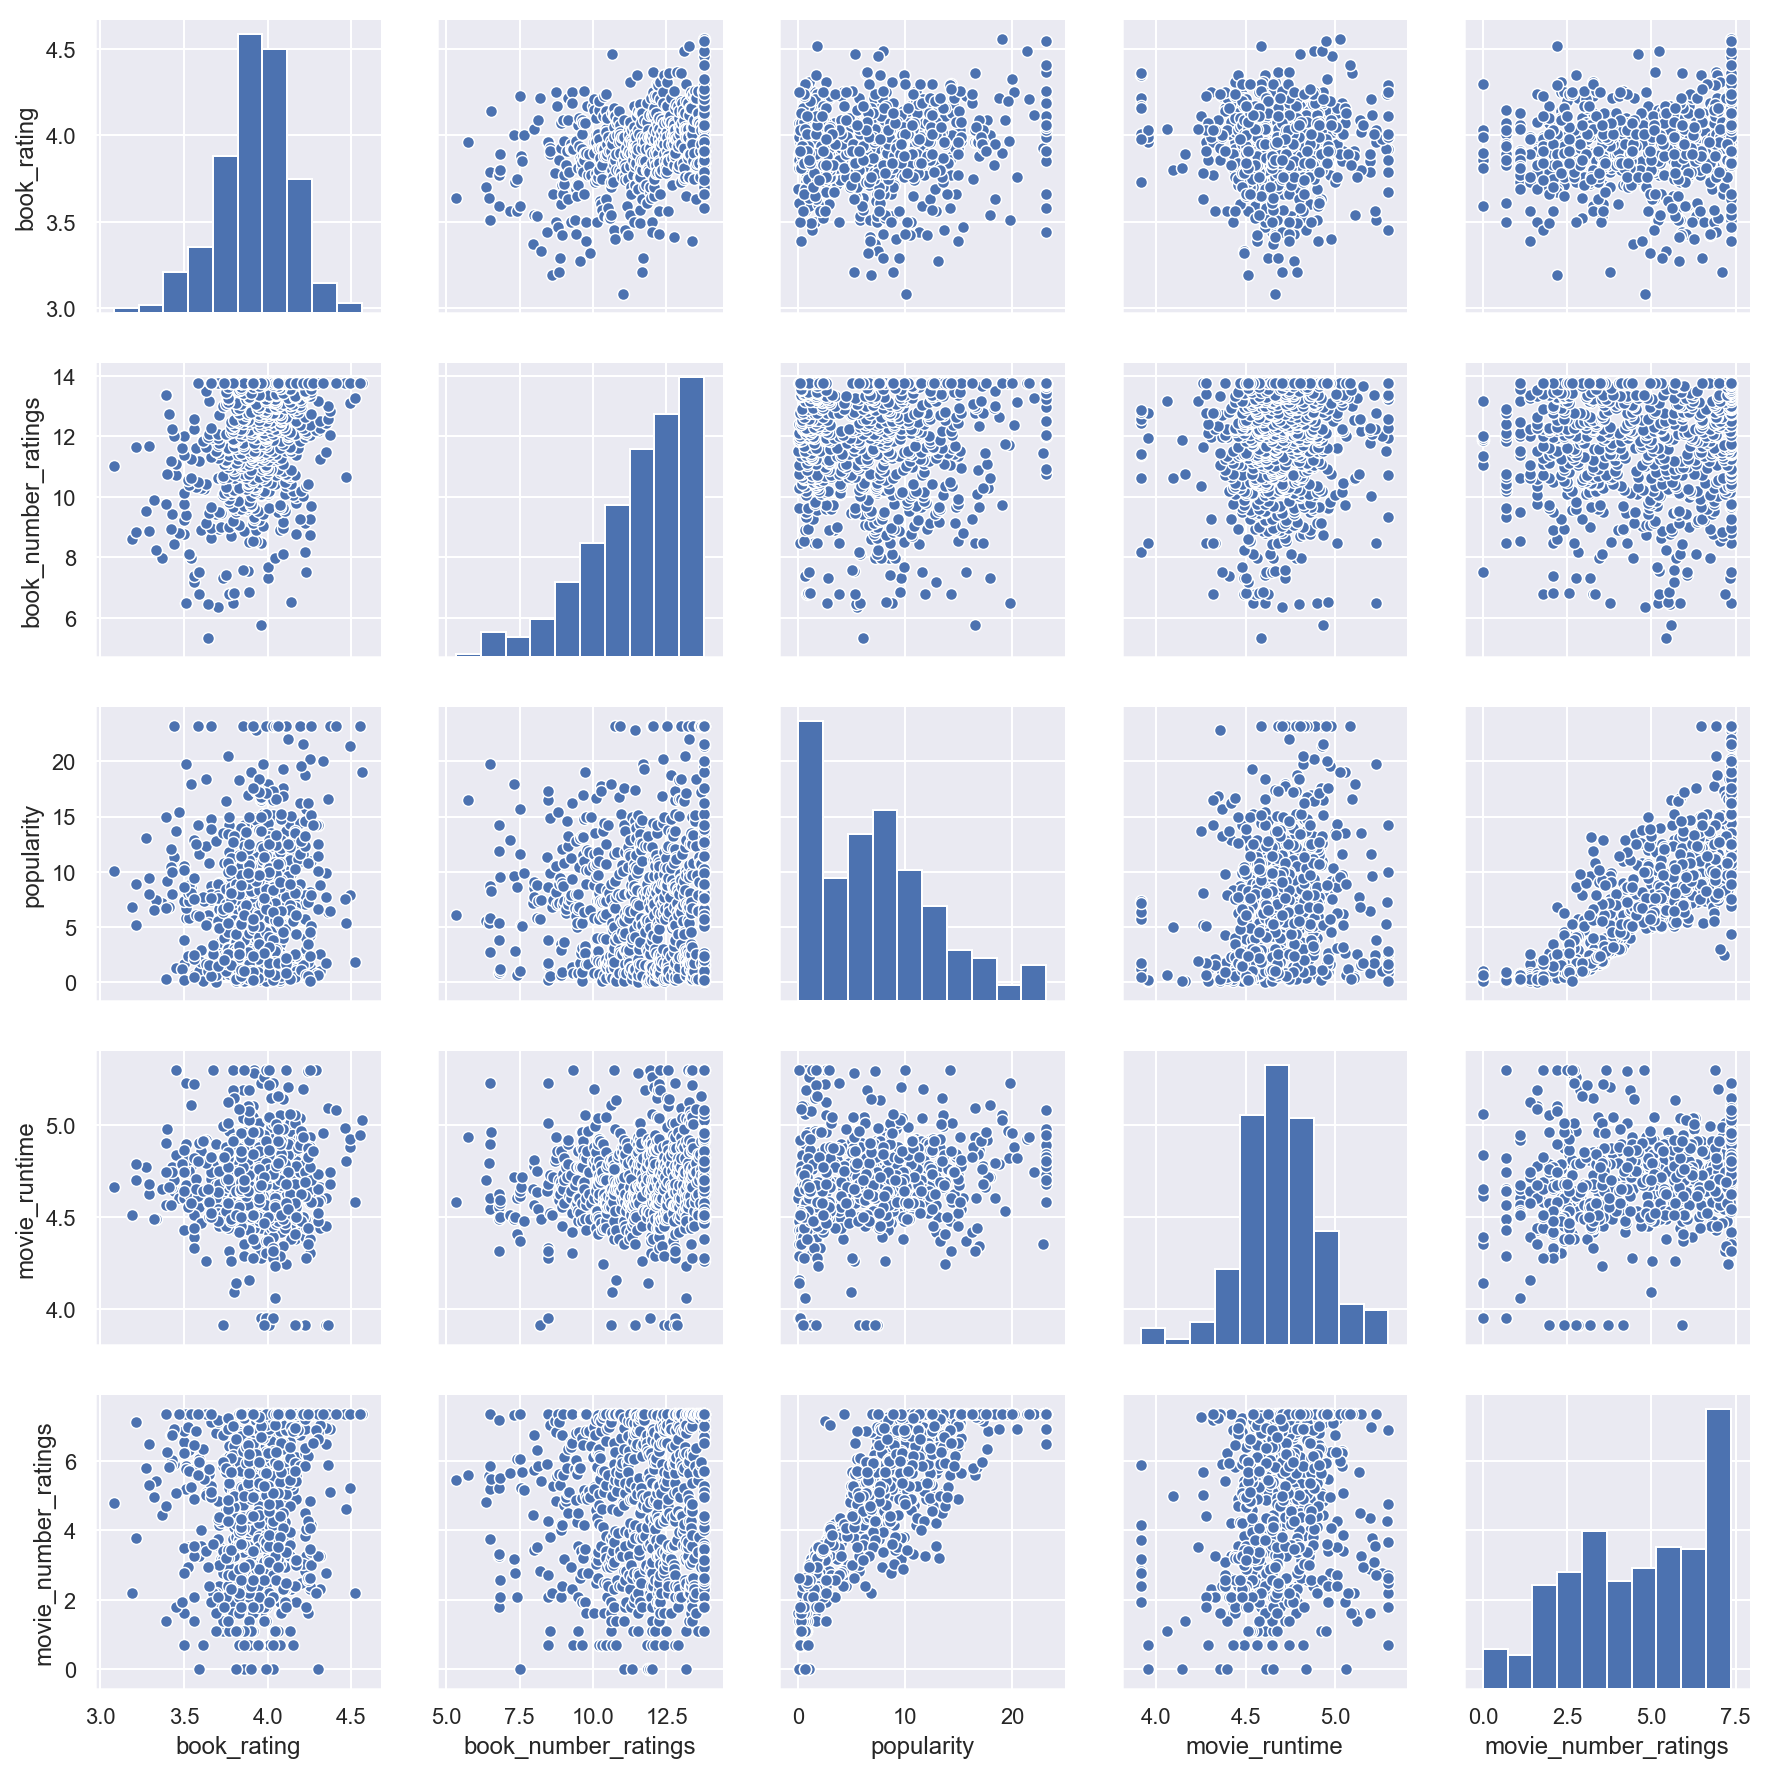

In [93]:
sns.pairplot(X3)